# Descriptive Analysis 

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)
os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

'/Users/NatStrom'

In [3]:
data_analysis = pd.read_csv('data_final.csv')

In [4]:
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,tot_affect,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25734,25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25735,25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25736,25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


In [5]:
data_analysis = data_analysis.drop(columns={'Unnamed: 0'})

In [6]:
print(data_analysis.dtypes)
print(data_analysis.columns)
print(data_analysis.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(data_analysis['iso'].drop_duplicates()))
list_year=list(list(data_analysis['year_id'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(data_analysis['iso'].isnull().values.any())
print(data_analysis['year_id'].isnull().values.any())
print(data_analysis['ihme_healthworkers_all_mean'].isnull().values.any())
print(data_analysis['best_log'].isnull().values.any())
print(data_analysis['daly_all'].isnull().values.any())
print(data_analysis['age0014_value'].isnull().values.any())
print(data_analysis['gdp_pcap_value'].isnull().values.any())
print(data_analysis['xpd_gdp_value'].isnull().values.any())
print(data_analysis['dah_total_log'].isnull().values.any())
print(data_analysis['access_drinkwater_index'].isnull().values.any())
print(data_analysis['access_sani_index'].isnull().values.any())

iso                                                                                                                      object
year_id                                                                                                                   int64
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    float64
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    float64
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages  

In [7]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25738 entries, 0 to 25737
Data columns (total 49 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   iso                                                                                                                   25738 non-null  object 
 1   year_id                                                                                                               25738 non-null  int64  
 2   daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                  25738 non-null  float64
 3   daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                  25738 non-null  float64
 4   daly

## dependent variable

In [8]:
print(data_analysis['daly_all'].describe())
print(data_analysis['daly_all'].info())
#standard deviation should not be 0, that would mean it does not change over time

count    25738.000000
mean     14938.570985
std       8979.185496
min       1908.000000
25%       7713.000000
50%      13383.000000
75%      19280.000000
max      74108.000000
Name: daly_all, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 25738 entries, 0 to 25737
Series name: daly_all
Non-Null Count  Dtype  
--------------  -----  
25738 non-null  float64
dtypes: float64(1)
memory usage: 201.2 KB
None


In [9]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=False, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

custom_describe(data_analysis['daly_all'])
data_analysis['daly_all'].describe()

count    25738.000000
mean     14938.570985
std       8979.185496
min       1908.000000
25%       7713.000000
50%      13383.000000
75%      19280.000000
max      74108.000000
Name: daly_all, dtype: float64

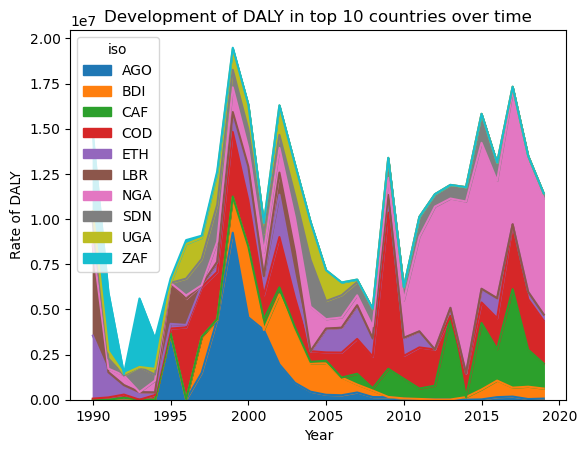

In [10]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'daly_all': 'sum'})
top_donors = grouped.groupby('iso').agg({'daly_all': 'sum'}).nlargest(10, 'daly_all').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='daly_all')
pivoted.plot.area(stacked=True)

plt.title('Development of DALY in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Rate of DALY')
plt.savefig('timetrend_daly.png')
# Show the plot
plt.show()

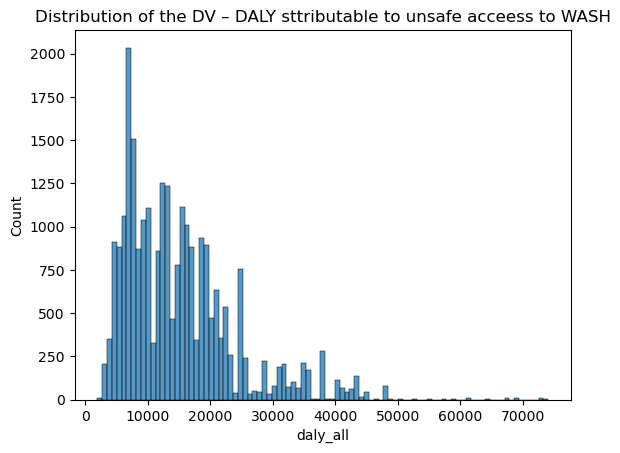

In [11]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'])
plt.title('Distribution of the DV – DALY sttributable to unsafe acceess to WASH')
plt.savefig('daly_all_hist.png')

In [12]:
#test for skweness
import scipy
from scipy.stats import skewtest
scipy.stats.skewtest(data_analysis['daly_all'], axis=0, nan_policy='omit', alternative='two-sided')

SkewtestResult(statistic=71.74955336856267, pvalue=0.0)

In [13]:
#test for outliers
## see data_analysis.daly_all.describe() or the boxplots
### clear indication that there are outliers - now use statistical tests

In [14]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

## generally 29% missingness, which is strange since it sshould be complete, its estimates

,col,pct_missing
0,iso,0.000000
1,year_id,0.000000
2,daly_mean_All causes_No access to handwashing ...,0.000000
3,daly_mean_All causes_Unsafe sanitation_btsx_Al...,0.000000
4,daly_mean_All causes_Unsafe water source_btsx_...,0.000000
5,"daly_mean_Communicable, maternal, neonatal, an...",0.000000
6,"daly_mean_Communicable, maternal, neonatal, an...",0.000000
7,"daly_mean_Communicable, maternal, neonatal, an...",0.000000
8,daly_mean_Diarrheal diseases_No access to hand...,0.000000
9,daly_mean_Diarrheal diseases_Unsafe sanitation...,0.000000


In [15]:
#what to do with missing data? balanced/ unbalanced panel?


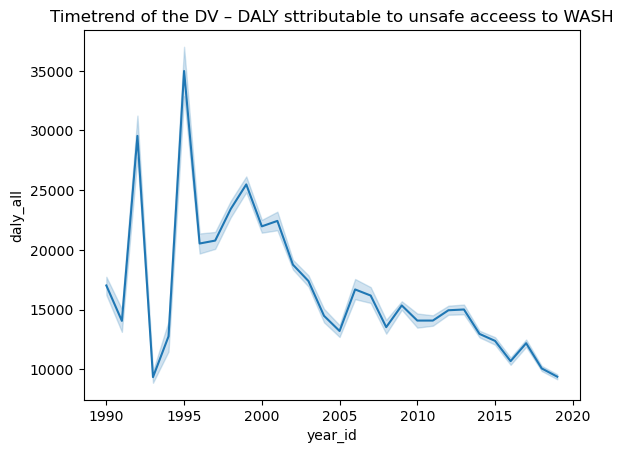

In [16]:
#time trend of the data
sns.lineplot(x='year_id',y='daly_all',data=data_analysis)
plt.title('Timetrend of the DV – DALY sttributable to unsafe acceess to WASH')
plt.savefig('daly_all_timetrend.png')

In [17]:
#judging from the descriptive analysis, need there be any transformations?
##no

## independent variable

binary conflict variable

In [18]:
data_analysis['dummy_conflict'].describe()

count    25738.000000
mean         0.846997
std          0.359998
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: dummy_conflict, dtype: float64

In [19]:
data_analysis['dummy_conflict_hightreshold'].describe()

count    25738.000000
mean         0.108322
std          0.310793
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dummy_conflict_hightreshold, dtype: float64

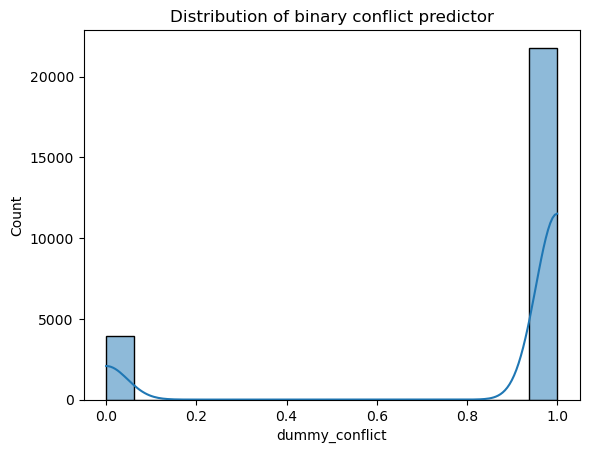

In [20]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.title('Distribution of binary conflict predictor')
plt.savefig('dummy_conflict_hist.png')

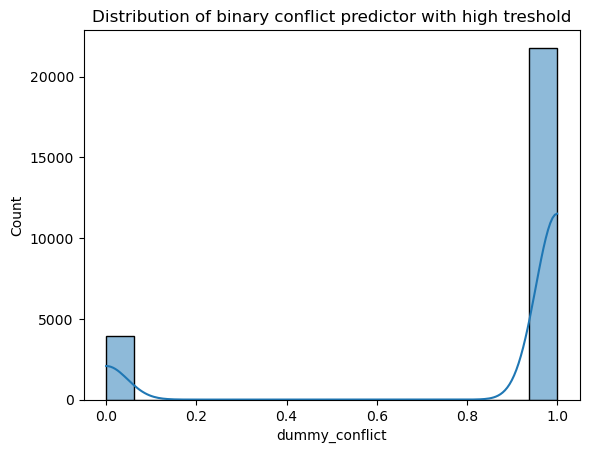

In [21]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.title('Distribution of binary conflict predictor with high treshold')
plt.savefig('dummy_conflict_hist_hightreshoold.png')

best_log fatalities

In [22]:
data_analysis['best_log'].describe()

count    25391.000000
mean         1.575485
std          1.275295
min          0.000000
25%          0.693147
50%          1.386294
75%          2.302585
max         10.782782
Name: best_log, dtype: float64

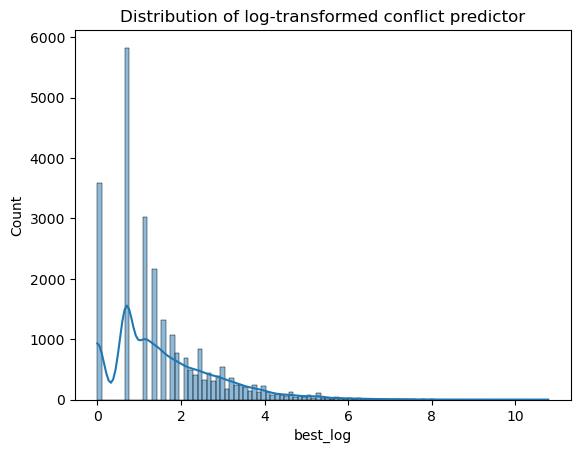

In [23]:
#produce distribution plots
sns.histplot(data_analysis['best_log'],kde = True)
plt.title('Distribution of log-transformed conflict predictor')
plt.savefig('best_hist.png')

#what does the distribution say? --> log transform the variable

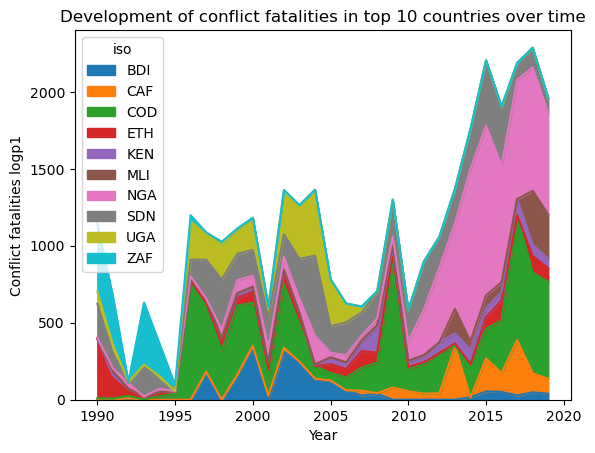

In [24]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'best_log': 'sum'})
top_donors = grouped.groupby('iso').agg({'best_log': 'sum'}).nlargest(10, 'best_log').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='best_log')
pivoted.plot.area(stacked=True)

plt.title('Development of conflict fatalities in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Conflict fatalities logp1')
plt.savefig('timetrend_conflict.png')

# Show the plot
plt.show()

In [25]:
##inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                       0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                       0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                     0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                     0


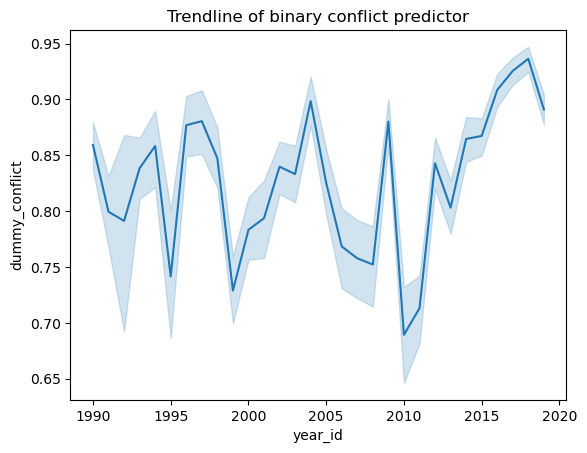

In [26]:

sns.lineplot(x='year_id' ,y='dummy_conflict',data=data_analysis)
plt.title('Trendline of binary conflict predictor')
plt.savefig('conflict_trend.png')

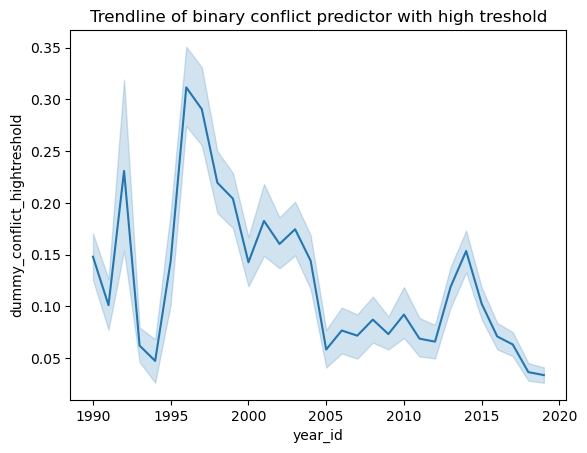

In [27]:

sns.lineplot(x='year_id' ,y='dummy_conflict_hightreshold',data=data_analysis)
plt.title('Trendline of binary conflict predictor with high treshold')
plt.savefig('conflict_trend_hightreshold.png')

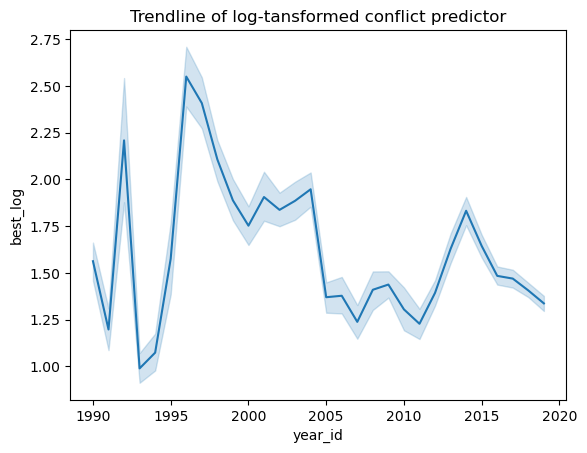

In [28]:

sns.lineplot(x='year_id' ,y='best_log',data=data_analysis)
plt.title('Trendline of log-tansformed conflict predictor')
plt.savefig('conflict_trend_log.png')

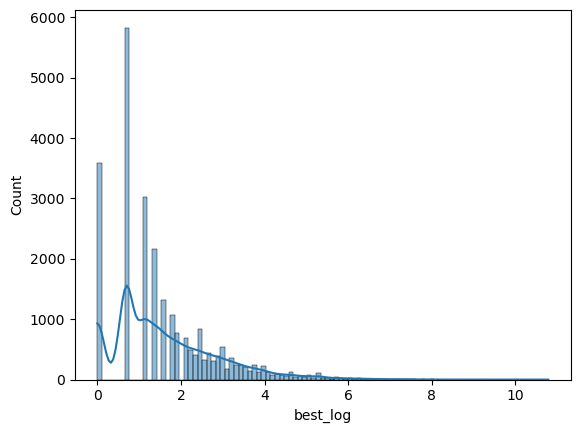

In [29]:
#compare logtransformed with non logtransfomed variables

sns.histplot(data_analysis['best_log'],kde=True)

plt.savefig('conflict_log.png')

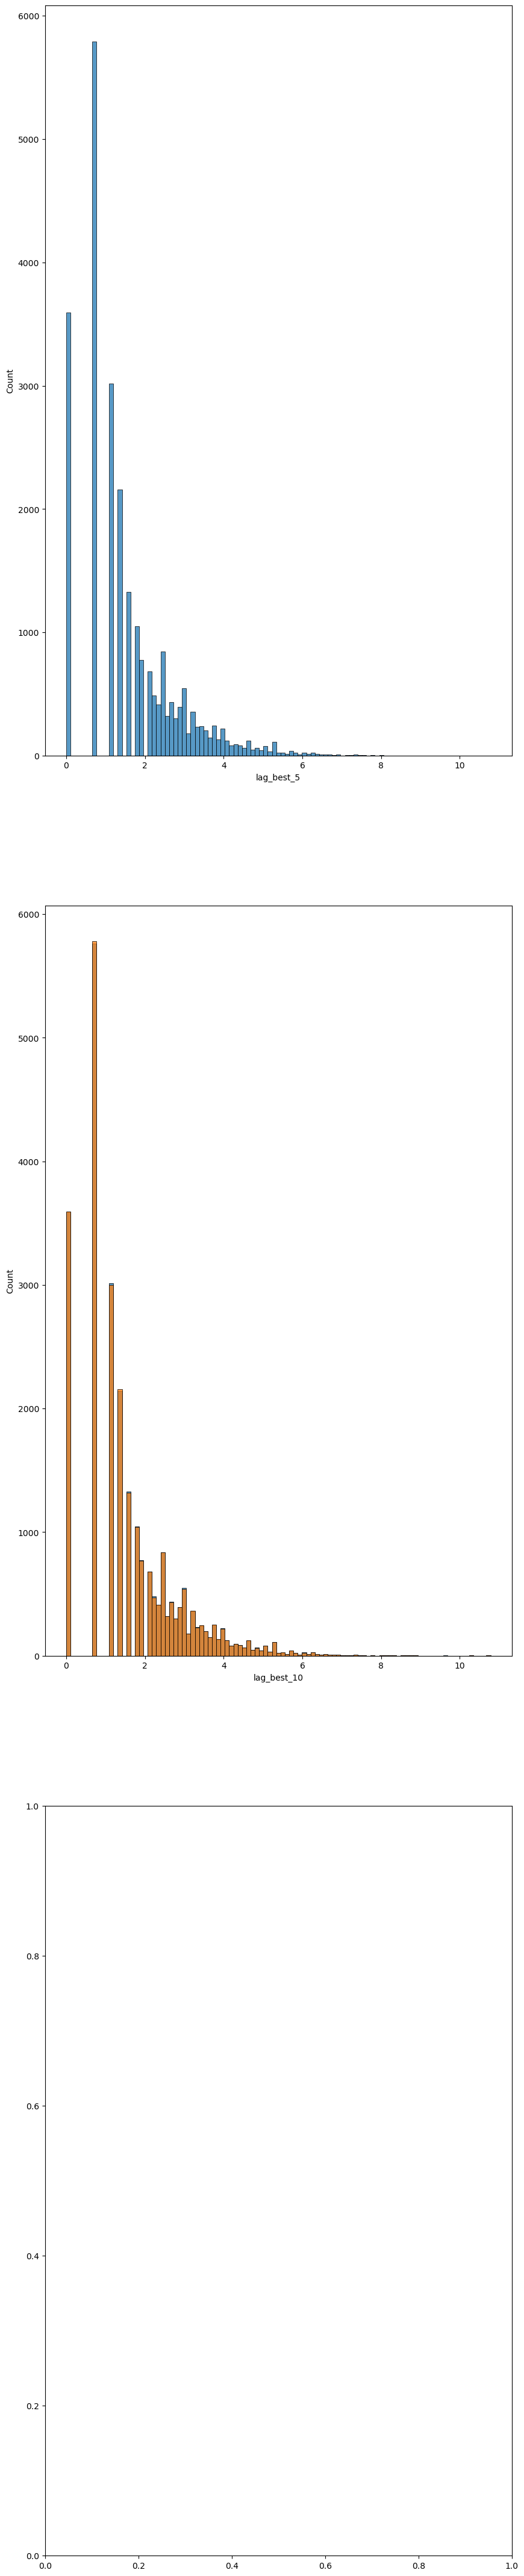

In [30]:
#inspect the conflict lags
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['lag_best_5'],ax=axes[0])
sns.histplot(data_analysis['lag_best_10'],ax=axes[1])
sns.histplot(data_analysis['lag_best_20'],ax=axes[1])

plt.savefig('conflict_lag.png')

dummy type of conflict

In [31]:
data_analysis[['dummy_sb','dummy_os','dummy_ns']].describe()

,dummy_sb,dummy_os,dummy_ns
count,25738.000000,25738.000000,25738.000000
mean,0.390434,0.380177,0.215906
std,0.487857,0.485440,0.411458
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


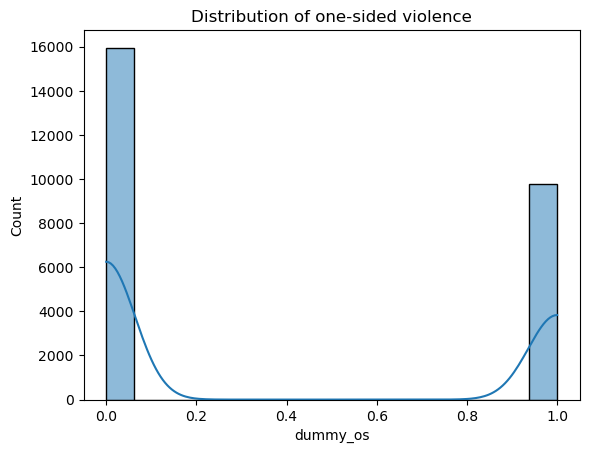

In [32]:
sns.histplot(data_analysis['dummy_os'],kde=True)
plt.title('Distribution of one-sided violence')
plt.savefig('conflictos.png')

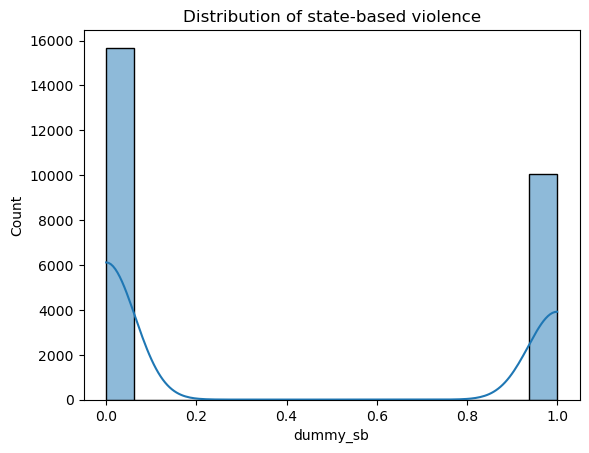

In [33]:
sns.histplot(data_analysis['dummy_sb'],kde=True)
plt.title('Distribution of state-based violence')
plt.savefig('conflict_sb.png')

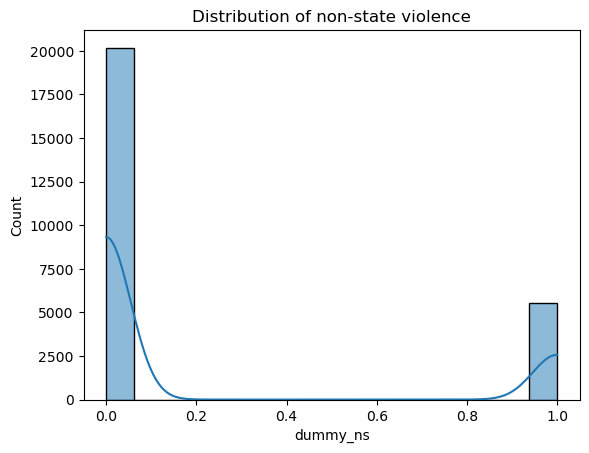

In [34]:
#inspect the conflict lags
sns.histplot(data_analysis['dummy_ns'],kde=True)
plt.title('Distribution of non-state violence')
plt.savefig('conflict_ns.png')

dummy neighboring country in conflict

In [35]:
data_analysis['dummy_neighbor'].describe()

count    23932.000000
mean         0.983662
std          0.126774
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: dummy_neighbor, dtype: float64

In [36]:
data_analysis['dummy_neighbor_hightreshold'].describe()

count    23932.000000
mean         0.864658
std          0.342095
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: dummy_neighbor_hightreshold, dtype: float64

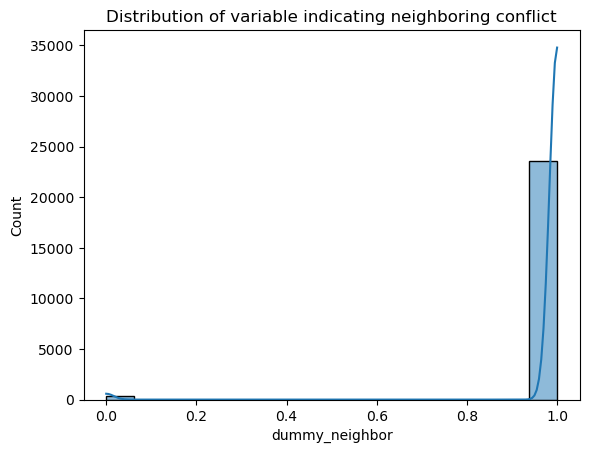

In [37]:
sns.histplot(data_analysis['dummy_neighbor'],kde=True)
plt.title('Distribution of variable indicating neighboring conflict')
plt.savefig('conflict_neighbor.png')

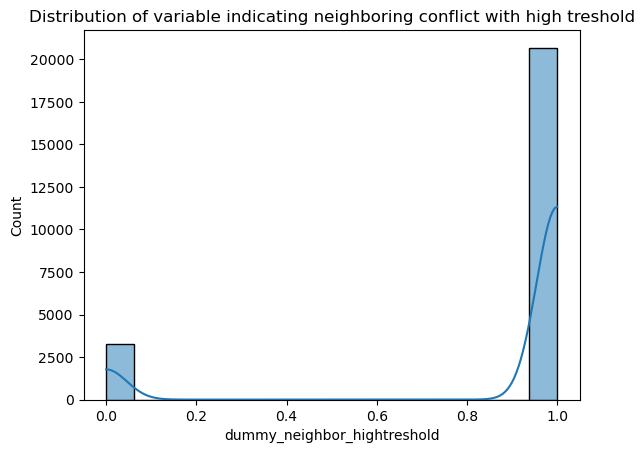

In [38]:
sns.histplot(data_analysis['dummy_neighbor_hightreshold'],kde=True)
plt.title('Distribution of variable indicating neighboring conflict with high treshold')
plt.savefig('conflict_neighbor_hightreshold.png')

## controls package standard

In [39]:
#get descriptives
print(data_analysis['gdp_log'].describe())
print(data_analysis['age0014_value'].describe())
print(data_analysis['xpd_gdp_value'].describe())
# all variables vary over time, the std is not zero

count    25738.000000
mean         6.514882
std          1.317061
min          0.000000
25%          5.771008
50%          6.446216
75%          7.661920
max          9.142973
Name: gdp_log, dtype: float64
count    25738.000000
mean        44.865211
std          2.940141
min         28.275352
25%         43.290111
50%         44.708968
75%         46.437458
max         50.556055
Name: age0014_value, dtype: float64
count    25738.000000
mean         5.961388
std          9.009894
min          0.000000
25%          0.000000
50%          0.000000
75%         11.394376
max         46.492018
Name: xpd_gdp_value, dtype: float64


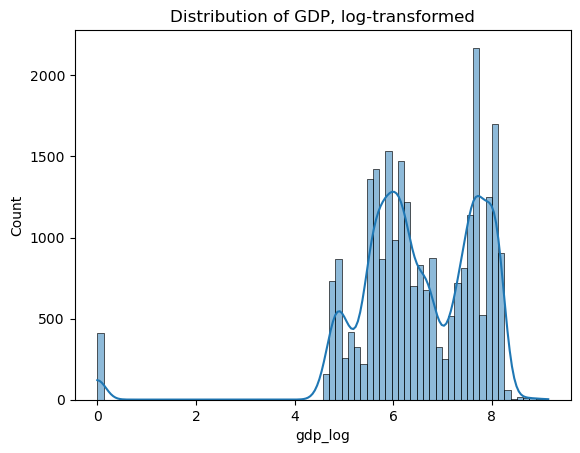

In [40]:
sns.histplot(data_analysis['gdp_log'],kde=True)
plt.title('Distribution of GDP, log-transformed')
plt.savefig('gdp_hist.png')

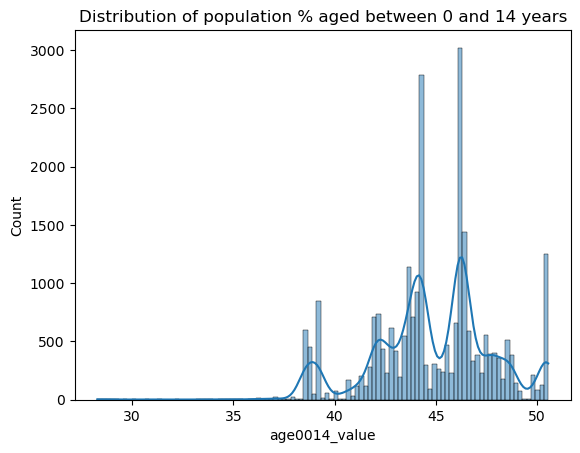

In [41]:
sns.histplot(data_analysis['age0014_value'],kde=True)
plt.title('Distribution of population % aged between 0 and 14 years')
plt.savefig('age0014_hist.png')

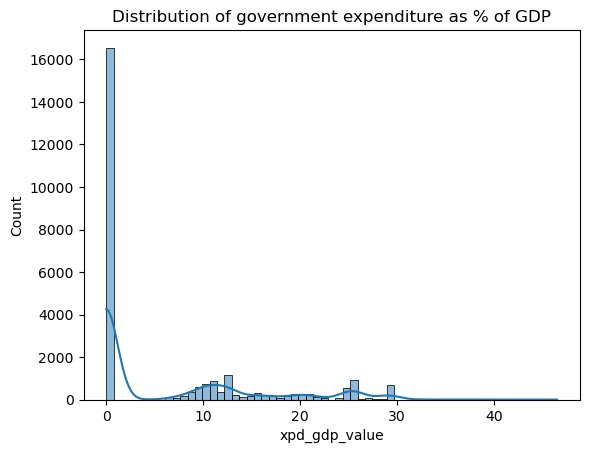

In [42]:
#produce distribution plot
sns.histplot(data_analysis['xpd_gdp_value'],kde=True)
plt.title('Distribution of government expenditure as % of GDP')
plt.savefig('gov_expense_hist.png')

#gdp has already been logtransformed

In [43]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                       0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                       0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                     0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                     0


In [44]:
data_analysis.to_csv('data_analysis.csv')

## controls package health

In [45]:
#get descriptives
display(data_analysis['ihme_healthworkers_all_mean'].describe())
display(data_analysis['dah_total_log'].describe())
#all varables vary over time, the std is not 0

count    25738.000000
mean        33.111440
std         16.927785
min          6.138000
25%         20.666000
50%         31.357000
75%         40.961000
max        106.671000
Name: ihme_healthworkers_all_mean, dtype: float64

count    23711.000000
mean        11.902470
std          1.681059
min          5.533389
25%         10.685149
50%         12.010915
75%         13.525002
max         14.271484
Name: dah_total_log, dtype: float64

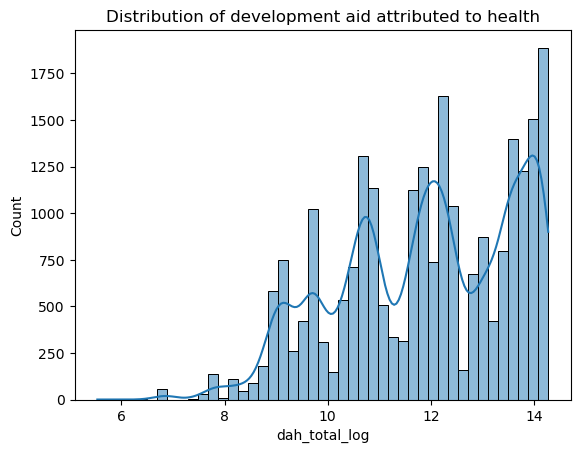

In [46]:
#produce distribution plots
sns.histplot(data_analysis['dah_total_log'],kde = True)
plt.title('Distribution of development aid attributed to health')
plt.savefig('dah_hist.png')
##dah has already been log transformed

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,healthworker_all_log
0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783
25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783
25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783
25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783


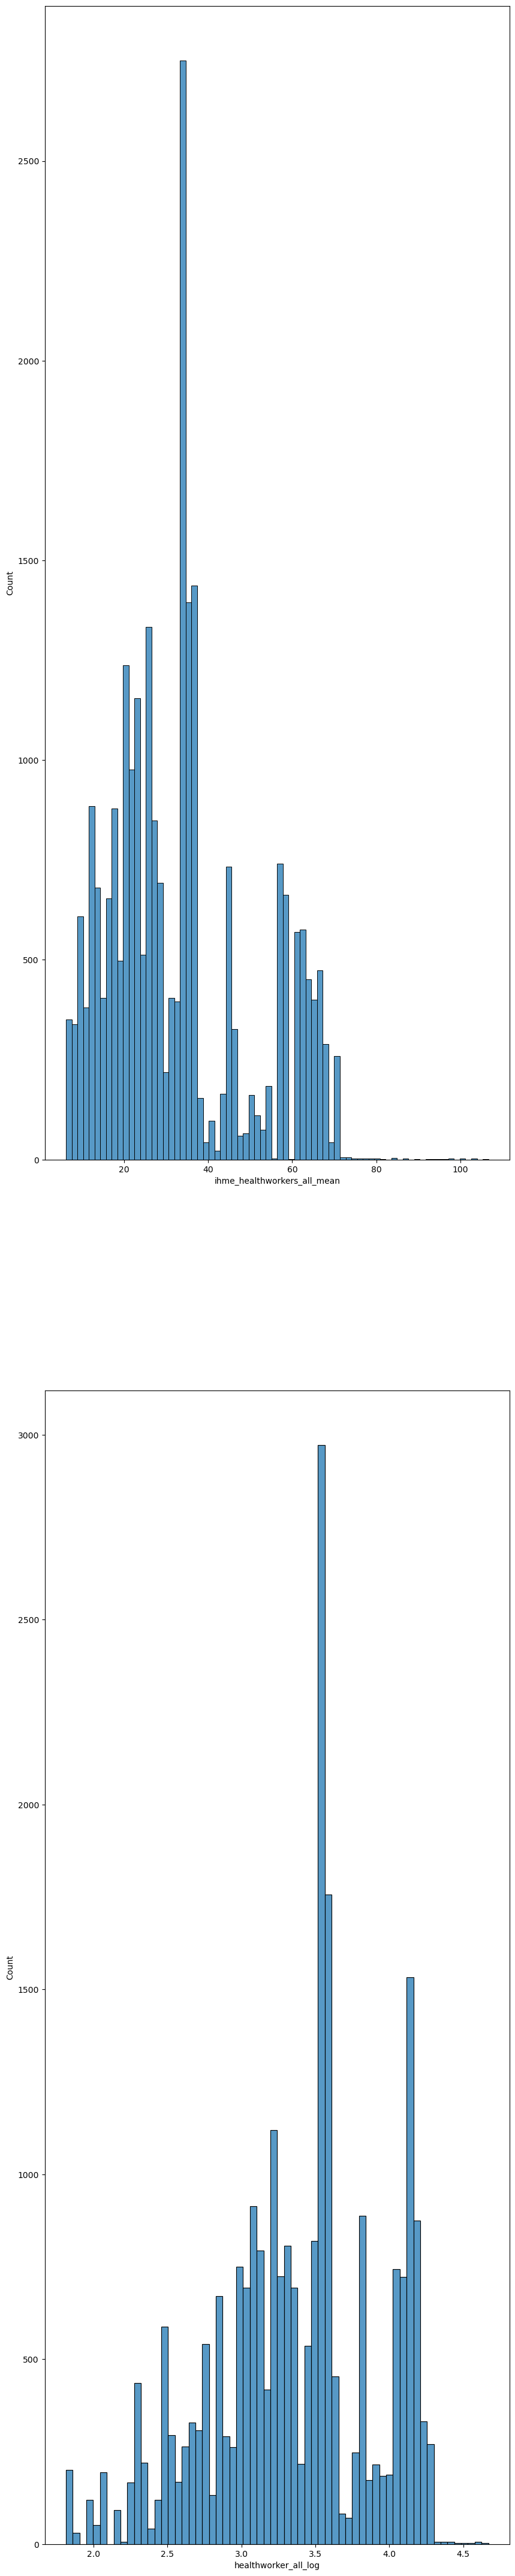

In [47]:
#logtransform the health worker density
data_analysis['healthworker_all_log'] = np.log(data_analysis['ihme_healthworkers_all_mean'])
display(data_analysis)

figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_analysis['ihme_healthworkers_all_mean'],ax=axes[0])
sns.histplot(data_analysis['healthworker_all_log'],ax=axes[1])

plt.savefig('healthworker_log.png')

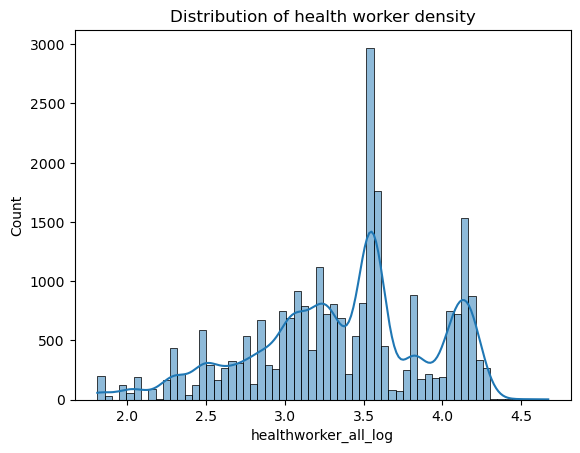

In [48]:
#produce distribution plot
sns.histplot(data_analysis['healthworker_all_log'],kde = True)
plt.title('Distribution of health worker density')
plt.savefig('healthworker_hist.png')
##dah has already been log transformed

In [49]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                       0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                       0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                     0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                     0


## controls package disaster

In [50]:
#get descriptives
display(data_analysis['access_drinkwater_index'].describe())
display(data_analysis['access_sani_index'].describe())
display(data_analysis['death_tot'].describe())
display(data_analysis['gdis_count_lag'].describe())

count    22441.000000
mean         8.438071
std          8.560589
min          0.000000
25%          0.000000
50%          6.385207
75%         17.344537
max         45.716468
Name: access_drinkwater_index, dtype: float64

count    22441.000000
mean        10.693602
std         11.144069
min          0.000000
25%          0.000000
50%          5.866489
75%         20.993230
max         45.820400
Name: access_sani_index, dtype: float64

count    25738.000000
mean       341.787241
std        747.099271
min          0.000000
25%         19.000000
50%         77.000000
75%        259.000000
max       7689.000000
Name: death_tot, dtype: float64

count    25738.000000
mean         3.483464
std          2.033905
min          0.000000
25%          2.302585
50%          3.828641
75%          5.288267
max          6.813445
Name: gdis_count_lag, dtype: float64

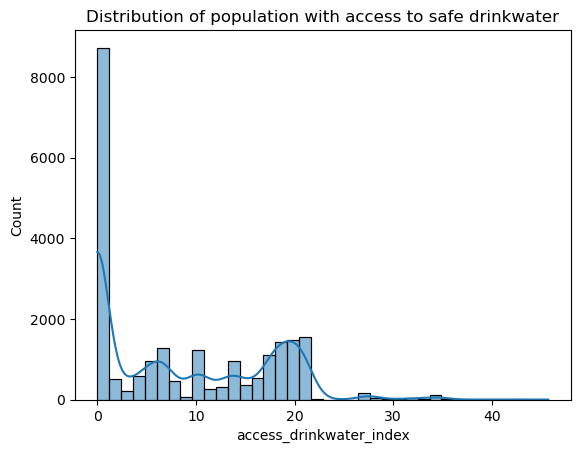

In [51]:
sns.histplot(data_analysis['access_drinkwater_index'],kde = True)
plt.title('Distribution of population with access to safe drinkwater')
plt.savefig('water_index_hist.png')

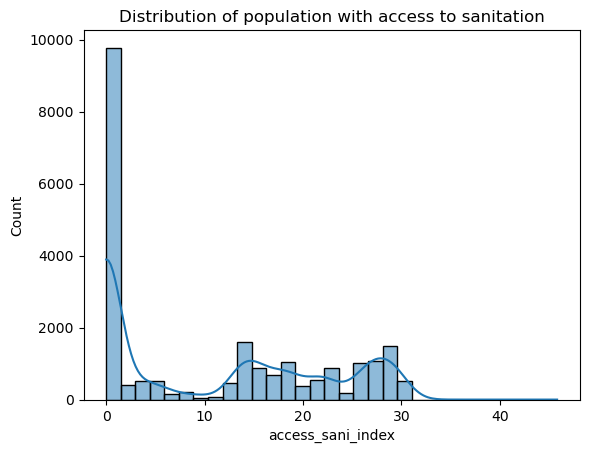

In [52]:
sns.histplot(data_analysis['access_sani_index'],kde = True)
plt.title('Distribution of population with access to sanitation')
plt.savefig('sani_index_hist.png')

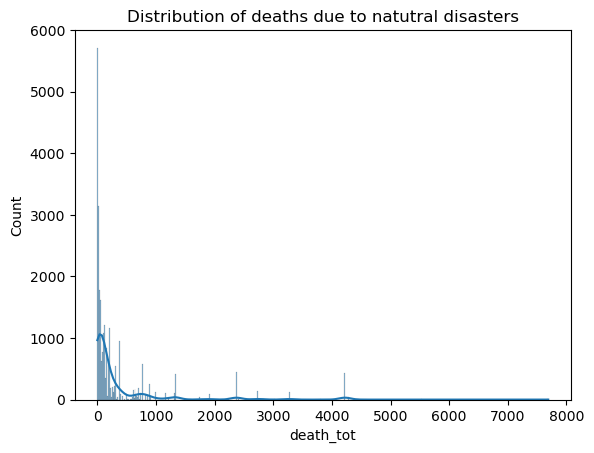

In [53]:
sns.histplot(data_analysis['death_tot'],kde = True)
plt.title('Distribution of deaths due to natutral disasters')
plt.savefig('death_emdat_hist.png')

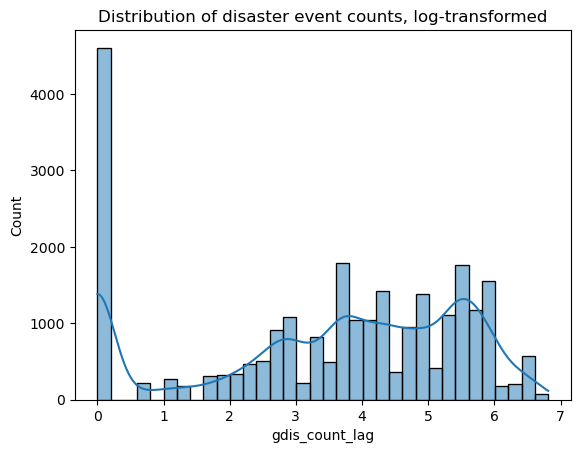

In [54]:
#produce distribution plots
sns.histplot(data_analysis['gdis_count_lag'],kde = True)
plt.title('Distribution of disaster event counts, log-transformed')
plt.savefig('disaster_event_hist.png')

In [55]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                       0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                       0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                     0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                     0


In [56]:
data_analysis.describe()

,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages,...,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,healthworker_all_log
count,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,...,2.573800e+04,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000
mean,2007.886083,3728.352786,4731.743958,6478.474240,3728.352786,4731.743958,6478.474240,2407.283860,4731.743958,6478.474240,...,5.213953e+07,115.598376,97.380682,3.483464,14938.570985,2641.164504,13617.502059,13617.502059,14938.570985,3.358417
std,8.959056,2161.793177,2909.144485,3942.039622,2161.793177,2909.144485,3942.039622,1482.360876,2909.144485,3942.039622,...,3.560595e+07,150.407029,122.146443,2.033905,8979.185496,1463.789589,8324.170822,8324.170822,8979.185496,0.554523
min,1990.000000,560.000000,484.000000,862.000000,560.000000,484.000000,862.000000,284.000000,484.000000,862.000000,...,3.920820e+05,0.000000,0.000000,0.000000,1908.000000,328.000000,1630.000000,1630.000000,1908.000000,1.814499
25%,2000.000000,1985.000000,2433.000000,3346.000000,1985.000000,2433.000000,3346.000000,1218.000000,2433.000000,3346.000000,...,2.808763e+07,9.000000,9.000000,2.302585,7713.000000,1434.000000,6777.000000,6777.000000,7713.000000,3.028490
50%,2010.000000,3428.000000,4056.000000,5576.000000,3428.000000,4056.000000,5576.000000,2128.000000,4056.000000,5576.000000,...,4.468043e+07,45.000000,43.000000,3.828641,13383.000000,2538.000000,12010.000000,12010.000000,13383.000000,3.445438
75%,2016.000000,4818.000000,6019.000000,8388.000000,4818.000000,6019.000000,8388.000000,3137.000000,6019.000000,8388.000000,...,9.575575e+07,197.000000,176.000000,5.288267,19280.000000,3438.000000,17646.000000,17646.000000,19280.000000,3.712620
max,2019.000000,17536.000000,24562.000000,32010.000000,17536.000000,24562.000000,32010.000000,11715.000000,24562.000000,32010.000000,...,1.256802e+08,909.000000,778.000000,6.813445,74108.000000,11640.000000,68287.000000,68287.000000,74108.000000,4.669749


# Start the statistical analysis in python

In [57]:
import statsmodels

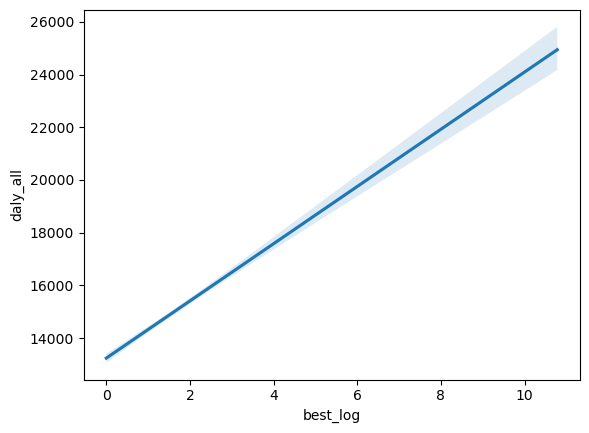

In [58]:
## simple regression plot with line of best fit between two variables
plot3 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

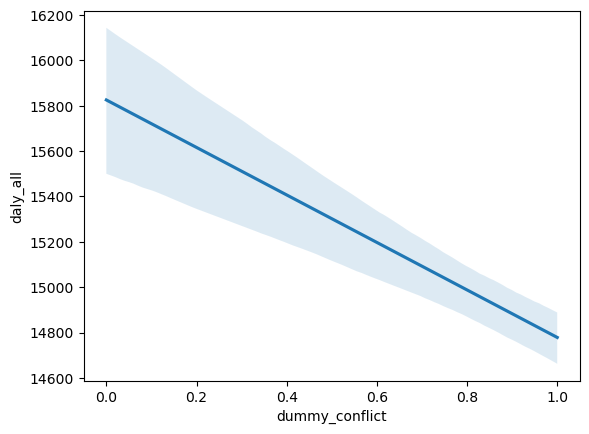

In [59]:
## simple regression plot with line of best fit between two variables
plot2 = sns.regplot(x='dummy_conflict',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

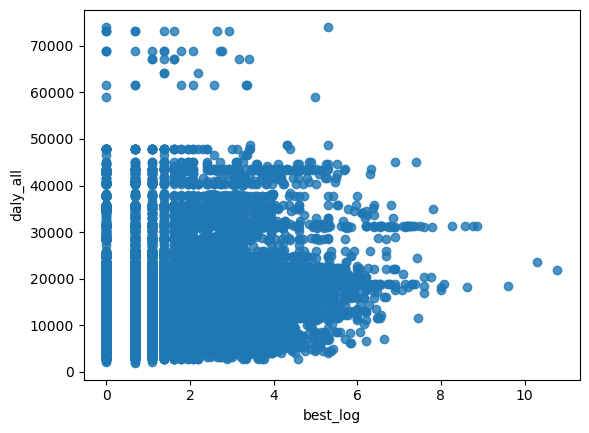

In [60]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

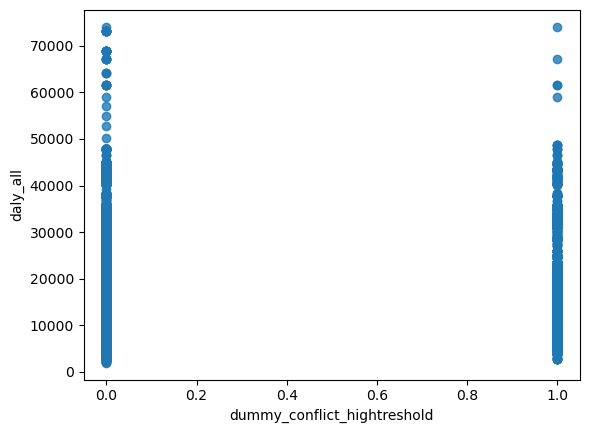

In [61]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='dummy_conflict_hightreshold',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

[Text(0.5, 1.0, 'Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')]

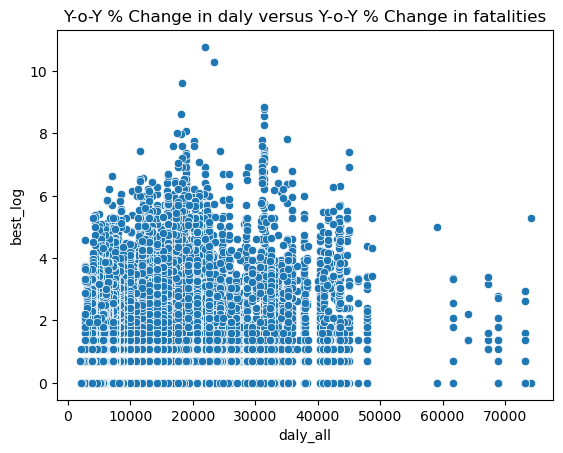

In [62]:
#plot of daly_all across all countries and years against the number of fatalities
 
sns.scatterplot(x=data_analysis['daly_all'], 
                y=data_analysis['best_log']).set(title='Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')

In [63]:
data = data_analysis.copy()

In [64]:
data.columns

Index(['iso', 'year_id',
       'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
       'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
       'daly_mean_All causes_Unsafe water source_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
       'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
       'daly_mean_Enteric in

In [65]:
#define datasets with the different types of conflict
data_sb = data.loc[data['type_of_violence'] == 'sb']
display(data_sb)

data_ns = data.loc[data['type_of_violence'] == 'ns']
display(data_ns)

data_os = data.loc[data['type_of_violence'] == 'os']
display(data_os)

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,healthworker_all_log
0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23594,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,2016.0,...,10522988,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0,3.240481
23595,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,2016.0,...,10522988,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0,3.240481
23596,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,2016.0,...,10522988,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0,3.240481
23597,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,2016.0,...,10522988,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0,3.240481


,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,healthworker_all_log
1067,BDI,1997,5543.0,7311.0,9727.0,5543.0,7311.0,9727.0,3695.0,7311.0,...,1373342,0.0,0.0,0.000000,22581.0,3694.0,20733.0,20733.0,22581.0,2.779875
1347,BDI,2000,4986.0,6746.0,8978.0,4986.0,6746.0,8978.0,3414.0,6746.0,...,1373342,1.0,1.0,0.693147,20710.0,3144.0,19138.0,19138.0,20710.0,2.860771
1684,BDI,2003,4721.0,6427.0,8557.0,4721.0,6427.0,8557.0,3258.0,6427.0,...,1373342,39.0,11.0,3.688879,19705.0,2926.0,18242.0,18242.0,19705.0,2.872717
1685,BDI,2003,4721.0,6427.0,8557.0,4721.0,6427.0,8557.0,3258.0,6427.0,...,1373342,39.0,11.0,3.688879,19705.0,2926.0,18242.0,18242.0,19705.0,2.872717
1686,BDI,2003,4721.0,6427.0,8557.0,4721.0,6427.0,8557.0,3258.0,6427.0,...,1373342,39.0,11.0,3.688879,19705.0,2926.0,18242.0,18242.0,19705.0,2.872717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25619,ZAF,2004,1284.0,1232.0,1994.0,1284.0,1232.0,1994.0,662.0,1232.0,...,42278727,224.0,197.0,5.416100,4510.0,1242.0,3888.0,3888.0,4510.0,4.298129
25620,ZAF,2004,1284.0,1232.0,1994.0,1284.0,1232.0,1994.0,662.0,1232.0,...,42278727,224.0,197.0,5.416100,4510.0,1242.0,3888.0,3888.0,4510.0,4.298129
25621,ZAF,2004,1284.0,1232.0,1994.0,1284.0,1232.0,1994.0,662.0,1232.0,...,42278727,224.0,197.0,5.416100,4510.0,1242.0,3888.0,3888.0,4510.0,4.298129
25634,ZAF,2016,624.0,559.0,958.0,624.0,559.0,958.0,317.0,559.0,...,42278727,131.0,121.0,4.882802,2141.0,612.0,1834.0,1834.0,2141.0,4.589457


,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,healthworker_all_log
65,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
66,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
67,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
68,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
69,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783
25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783
25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783
25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783


# base model using the binary conflict indicator

In [66]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_all = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_all.txt', 'w') as f:
    f.write(dummy_all.summary.as_text())
print(dummy_all)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0019
Estimator:                   PanelOLS   R-squared (Between):             -0.1802
No. Observations:               23932   R-squared (Within):               0.0019
Date:                Tue, May 16 2023   R-squared (Overall):             -0.1930
Time:                        01:06:33   Log-likelihood                -2.396e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      22.233
Entities:                          38   P-value                           0.0000
Avg Obs:                       629.79   Distribution:                 F(2,23892)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             1.8917
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


## Base model with binary predictor and different types of conflict

In [67]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_sb = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb.txt', 'w') as f:
    f.write(dummy_sb.summary.as_text())
print(dummy_sb)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0019
Estimator:                   PanelOLS   R-squared (Between):             -0.1723
No. Observations:                9150   R-squared (Within):               0.0019
Date:                Tue, May 16 2023   R-squared (Overall):             -0.1823
Time:                        01:06:33   Log-likelihood                -9.169e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      8.7622
Entities:                          24   P-value                           0.0002
Avg Obs:                       381.25   Distribution:                  F(2,9124)
Min Obs:                       4.0000                                           
Max Obs:                       1690.0   F-statistic (robust):             0.6197
                            

In [68]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_os = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os.txt', 'w') as f:
    f.write(dummy_os.summary.as_text())
print(dummy_os)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0051
Estimator:                   PanelOLS   R-squared (Between):             -0.2286
No. Observations:                9095   R-squared (Within):               0.0051
Date:                Tue, May 16 2023   R-squared (Overall):             -0.2407
Time:                        01:06:33   Log-likelihood                -9.069e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      23.090
Entities:                          32   P-value                           0.0000
Avg Obs:                       284.22   Distribution:                  F(2,9061)
Min Obs:                       1.0000                                           
Max Obs:                       2452.0   F-statistic (robust):             16.413
                            

In [69]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_ns = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummyns.txt', 'w') as f:
    f.write(dummy_ns.summary.as_text())
print(dummy_ns)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0019
Estimator:                   PanelOLS   R-squared (Between):             -0.0924
No. Observations:                5340   R-squared (Within):               0.0019
Date:                Tue, May 16 2023   R-squared (Overall):             -0.1219
Time:                        01:06:33   Log-likelihood                -5.279e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.0540
Entities:                          21   P-value                           0.0064
Avg Obs:                       254.29   Distribution:                  F(2,5317)
Min Obs:                       1.0000                                           
Max Obs:                       1573.0   F-statistic (robust):             3.0981
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# model with conflict history

In [70]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5','lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history.txt', 'w') as f:
    f.write(fat.summary.as_text())
print(fat)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.1182
Estimator:                   PanelOLS   R-squared (Between):              0.3297
No. Observations:               25074   R-squared (Within):               0.1182
Date:                Tue, May 16 2023   R-squared (Overall):              0.3481
Time:                        01:06:33   Log-likelihood                -2.503e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      839.32
Entities:                          25   P-value                           0.0000
Avg Obs:                       1003.0   Distribution:                 F(4,25045)
Min Obs:                       8.0000                                           
Max Obs:                       4583.0   F-statistic (robust):             25.935
                            

## try for different types of violence

In [71]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_cmnn']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_sb = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_sb.txt', 'w') as f:
    f.write(fat_sb.summary.as_text())
print(fat_sb)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:              daly_cmnn   R-squared:                        0.1369
Estimator:                   PanelOLS   R-squared (Between):              0.3457
No. Observations:                9868   R-squared (Within):               0.1369
Date:                Tue, May 16 2023   R-squared (Overall):              0.3477
Time:                        01:06:33   Log-likelihood                -9.888e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      390.36
Entities:                          21   P-value                           0.0000
Avg Obs:                       469.90   Distribution:                  F(4,9843)
Min Obs:                       4.0000                                           
Max Obs:                       1674.0   F-statistic (robust):             7.4980
                            

In [72]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_cmnn']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_os = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_os.txt', 'w') as f:
    f.write(fat_os.summary.as_text())
print(fat_os)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:              daly_cmnn   R-squared:                        0.1121
Estimator:                   PanelOLS   R-squared (Between):              0.2919
No. Observations:                9682   R-squared (Within):               0.1121
Date:                Tue, May 16 2023   R-squared (Overall):              0.3256
Time:                        01:06:33   Log-likelihood                 -9.62e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      304.75
Entities:                          24   P-value                           0.0000
Avg Obs:                       403.42   Distribution:                  F(4,9654)
Min Obs:                       1.0000                                           
Max Obs:                       2451.0   F-statistic (robust):             26.081
                            

In [73]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_cmnn']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_ns = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_ns.txt', 'w') as f:
    f.write(fat_os.summary.as_text())
print(fat_ns)

                          PanelOLS Estimation Summary                           
Dep. Variable:              daly_cmnn   R-squared:                        0.1340
Estimator:                   PanelOLS   R-squared (Between):              0.3851
No. Observations:                5524   R-squared (Within):               0.1340
Date:                Tue, May 16 2023   R-squared (Overall):              0.4524
Time:                        01:06:34   Log-likelihood                -5.438e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      212.78
Entities:                          20   P-value                           0.0000
Avg Obs:                       276.20   Distribution:                  F(4,5500)
Min Obs:                       1.0000                                           
Max Obs:                       1573.0   F-statistic (robust):             11.276
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


## Standard specification model

In [74]:
#the country fixed effects model STANDARD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','gdp_log', 'age0014_value','xpd_gdp_value',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(standard_spec.summary.as_text())
print(standard_spec)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.3193
Estimator:                   PanelOLS   R-squared (Between):              0.5553
No. Observations:               25391   R-squared (Within):               0.3193
Date:                Tue, May 16 2023   R-squared (Overall):              0.4926
Time:                        01:06:34   Log-likelihood                -2.502e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2973.8
Entities:                          33   P-value                           0.0000
Avg Obs:                       769.42   Distribution:                 F(4,25354)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             14.180
                            

## Health specification model

In [75]:
#the country fixed effects model HEALTH
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
health_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_health_specification.txt', 'w') as f:
    f.write(health_spec.summary.as_text())
print(health_spec)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.6780
Estimator:                   PanelOLS   R-squared (Between):             -20.013
No. Observations:               23372   R-squared (Within):               0.6780
Date:                Tue, May 16 2023   R-squared (Overall):             -24.841
Time:                        01:06:34   Log-likelihood                 -2.21e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.638e+04
Entities:                          31   P-value                           0.0000
Avg Obs:                       753.94   Distribution:                 F(3,23338)
Min Obs:                       1.0000                                           
Max Obs:                       4092.0   F-statistic (robust):             17.437
                            

## Disaster specification model

In [76]:
#the country fixed effects model DISASTER
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','access_drinkwater_index', 'access_sani_index', 'death_tot','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
disaster_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_disaster_specification.txt', 'w') as f:
    f.write(disaster_spec.summary.as_text())
print(disaster_spec)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.5632
Estimator:                   PanelOLS   R-squared (Between):             -4.1420
No. Observations:               22128   R-squared (Within):               0.5632
Date:                Tue, May 16 2023   R-squared (Overall):             -6.3532
Time:                        01:06:34   Log-likelihood                -2.113e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5697.5
Entities:                          31   P-value                           0.0000
Avg Obs:                       713.81   Distribution:                 F(5,22092)
Min Obs:                       1.0000                                           
Max Obs:                       4569.0   F-statistic (robust):             107.93
                            

## model including all specifications but overfitting

In [77]:
#the country fixed effects model ALL
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value','xpd_gdp_value','dah_total_log','healthworker_all_log','access_drinkwater_index', 'access_sani_index', 'death_tot','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
model_overfit = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(model_overfit.summary.as_text())
print(model_overfit)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.8211
Estimator:                   PanelOLS   R-squared (Between):             -45.741
No. Observations:               19890   R-squared (Within):               0.8211
Date:                Tue, May 16 2023   R-squared (Overall):             -60.564
Time:                        01:06:34   Log-likelihood                -1.807e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7009.9
Entities:                          24   P-value                           0.0000
Avg Obs:                       828.75   Distribution:                F(13,19853)
Min Obs:                       8.0000                                           
Max Obs:                       4038.0   F-statistic (robust):             3676.2
                            

# base model with high conflict treshold

In [78]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_all_hightresh.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0602
Estimator:                   PanelOLS   R-squared (Between):             -0.2780
No. Observations:               23932   R-squared (Within):               0.0602
Date:                Tue, May 16 2023   R-squared (Overall):             -0.3070
Time:                        01:06:35   Log-likelihood                -2.389e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      764.96
Entities:                          38   P-value                           0.0000
Avg Obs:                       629.79   Distribution:                 F(2,23892)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             10.788
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


## base model with hightreshold for different conflict types

In [79]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_sb_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb_hightresh.txt', 'w') as f:
    f.write(dummy_sb_high.summary.as_text())
print(dummy_sb_high)


/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0599
Estimator:                   PanelOLS   R-squared (Between):             -0.4811
No. Observations:                9150   R-squared (Within):               0.0599
Date:                Tue, May 16 2023   R-squared (Overall):             -0.5067
Time:                        01:06:35   Log-likelihood                -9.141e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      290.46
Entities:                          24   P-value                           0.0000
Avg Obs:                       381.25   Distribution:                  F(2,9124)
Min Obs:                       4.0000                                           
Max Obs:                       1690.0   F-statistic (robust):             9.5531
                            

In [80]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_ns_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_ns_hightresh.txt', 'w') as f:
    f.write(dummy_ns_high.summary.as_text())
print(dummy_ns_high)


/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.1435
Estimator:                   PanelOLS   R-squared (Between):             -0.2353
No. Observations:                5340   R-squared (Within):               0.1435
Date:                Tue, May 16 2023   R-squared (Overall):             -0.2549
Time:                        01:06:35   Log-likelihood                -5.238e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      445.34
Entities:                          21   P-value                           0.0000
Avg Obs:                       254.29   Distribution:                  F(2,5317)
Min Obs:                       1.0000                                           
Max Obs:                       1573.0   F-statistic (robust):             11.743
                            

In [81]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_os_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os_hightresh.txt', 'w') as f:
    f.write(dummy_os_high.summary.as_text())
print(dummy_os_high)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0415
Estimator:                   PanelOLS   R-squared (Between):             -0.1814
No. Observations:                9095   R-squared (Within):               0.0415
Date:                Tue, May 16 2023   R-squared (Overall):             -0.1818
Time:                        01:06:35   Log-likelihood                -9.052e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      196.18
Entities:                          32   P-value                           0.0000
Avg Obs:                       284.22   Distribution:                  F(2,9061)
Min Obs:                       1.0000                                           
Max Obs:                       2452.0   F-statistic (robust):             5.6255
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [82]:
data_analysis.to_csv('data_analysis.csv')

## get influential cases and outliers

In [83]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Obtain the residuals and leverage values
residuals = model_overfit.resid
leverage = model_overfit.get_influence().hat_matrix_diag

# Plot the standardized residuals against the leverage values
fig, ax = plt.subplots()
ax.scatter(leverage, results.resid_pearson, alpha=0.5)
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')
ax.set_title('Residuals vs Leverage')
plt.show()

AttributeError: 'PanelEffectsResults' object has no attribute 'resid'

## test for multicollinearity

In [85]:
#exclude missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Extract the control variables into a separate DataFrame
control_vars = data_analysis[['dah_total_log','age0014_value', 'gdp_log','healthworker_all_log', 'access_drinkwater_index','access_sani_index', 'death_tot', 'gdis_count',]]

# Add a constant column to the control variables DataFrame
control_vars = add_constant(control_vars)

# Calculate the VIF for each control variable
vif = pd.DataFrame()
vif["Variable"] = control_vars.columns
vif["VIF"] = [variance_inflation_factor(control_vars.values, i) for i in range(control_vars.shape[1])]

# Display the VIF results
print(vif)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


MissingDataError: exog contains inf or nans

# Creating one summary table

In [ ]:
import stargazer
import statsmodels as sm
from stargazer.stargazer import Stargazer, LineLocation
from statsmodels.iolib.summary2 import summary_col

In [ ]:
with open('results_all_test.txt', 'w') as f:
    f.write((fat,fat_sb,fat_ns,fat_os).summary.as_text())

In [ ]:
fat_models = Stargazer([fat,standard_spec,health_spec,disaster,spec])

# CUT HERE